## **Predicts  the  engine  rating  based  on  the  inspection  parameters**

**Submitted By: Lavish Isasare**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [3]:
df = pd.read_csv("ML Data - data1.csv")
df

C:\Users\Lavis\AppData\Local\Temp\ipykernel_7720\2653577433.py:1: DtypeWarning: Columns (21,32,33,60) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ML Data - data1.csv")


,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,...,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2/3/19 15:43,2008,8,No,Weak,NaN,NaN,NaN,NaN,...,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600,3.0
1,aj_02,1/16/19 13:02,2007,5,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,78108,4.0
2,aj_03,2/9/19 13:31,2012,5,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,93348,3.5
3,aj_04,1/18/19 11:02,2013,1,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,48233,3.5
4,aj_05,1/27/19 12:12,2011,7,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,74368,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26302,aj_26303,3/10/19 13:08,2013,3,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Electrical wiring Damaged,NaN,NaN,NaN,NaN,Petrol + CNG,64532,4.0
26303,aj_26304,4/12/19 13:59,2007,8,No,Weak,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,88051,4.0
26304,aj_26305,2/28/19 10:42,2004,7,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,22656,3.5
26305,aj_26306,4/2/19 12:21,2010,12,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,126015,4.5


In [4]:
pd.set_option('display.max_columns', 200)


In [5]:
df

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOilLevelDipstick_cc_value_0,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engineOil_cc_value_3,engineTransmission_engineOil_cc_value_4,engineTransmission_engineOil_cc_value_5,engineTransmission_engineOil_cc_value_6,engineTransmission_engineOil_cc_value_7,engineTransmission_engineOil_cc_value_8,engineTransmission_engineOil_cc_value_9,engineTransmission_engine_value,engineTransmission_engine_cc_value_0,engineTransmission_engine_cc_value_1,engineTransmission_engine_cc_value_2,engineTransmission_engine_cc_value_3,engineTransmission_engine_cc_value_4,engineTransmission_engine_cc_value_5,engineTransmission_engine_cc_value_6,engineTransmission_engine_cc_value_7,engineTransmission_engine_cc_value_8,engineTransmission_engine_cc_value_9,engineTransmission_engine_cc_value_10,engineTransmission_coolant_value,engineTransmission_coolant_cc_value_0,engineTransmission_coolant_cc_value_1,engineTransmission_coolant_cc_value_2,engineTransmission_coolant_cc_value_3,engineTransmission_engineMounting_value,engineTransmission_engineMounting_cc_value_0,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_engineSound_cc_value_2,engineTransmission_engineSound_cc_value_3,engineTransmission_engineSound_cc_value_4,engineTransmission_engineSound_cc_value_5,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_clutch_cc_value_1,engineTransmission_clutch_cc_value_2,engineTransmission_clutch_cc_value_3,engineTransmission_clutch_cc_value_4,engineTransmission_clutch_cc_value_5,engineTransmission_clutch_cc_value_6,engineTransmission_gearShifting_value,engineTransmission_gearShifting_cc_value_0,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2/3/19 15:43,2008,8,No,Weak,NaN,NaN,NaN,NaN,Yes,NaN,No,Leaking,Dirty,Leakage from Tappet Cover,Leakage from Side cover,NaN,NaN,NaN,NaN,NaN,NaN,No,Repaired,Misfiring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Leaking,Dirty,NaN,NaN,No,Excess Vibration,No,Alternator Brg Noise,Water Pump Brg Noise,Timing Noise,Tappet Noise,Engine Auxiliary Noise,NaN,No,White,No,Back Compression Exist,No,Spongy,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600,3.0
1,aj_02,1/16/19 13:02,2007,5,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,No,Leaking,Dirty,Leakage from Tappet Cover,Leakage from Side cover,Leakage from Sump/chamber,NaN,NaN,NaN,NaN,NaN,No,RPM fluctuating,Misfiring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Leaking,Dirty,NaN,NaN,Yes,NaN,No,Timing Noise,Tappet Noise,Engine Auxiliary Noise,NaN,NaN,NaN,No,Noise from silencer assembly,Yes,NO Blow-by,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,78108,4.0
2,aj_03,2/9/19 13:31,2012,5,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,No,Dirty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Dirty,NaN,NaN,NaN,No,Excess Vibration,No,Alternator Brg Noise,Engine Auxiliary Noise,NaN,NaN,NaN,NaN,No,Black,Yes,Perm. Blow By on idle,No,Hard,Spongy,NaN,NaN,NaN,Na

In [6]:
df.shape

(26307, 73)

In [7]:
df.isna().sum()

appointmentId                              0
inspectionStartTime                        0
year                                       0
month                                      0
engineTransmission_battery_value           0
                                       ...  
engineTransmission_comments_value_3    26248
engineTransmission_comments_value_4    26293
fuel_type                                  0
odometer_reading                           0
rating_engineTransmission                  0
Length: 73, dtype: int64

In [8]:
df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0]

engineTransmission_battery_cc_value_0                    86.931235
engineTransmission_battery_cc_value_1                    98.365454
engineTransmission_battery_cc_value_2                    99.726309
engineTransmission_battery_cc_value_3                    99.939180
engineTransmission_battery_cc_value_4                    99.984795
engineTransmission_engineOilLevelDipstick_cc_value_0     98.437678
engineTransmission_engineOil_cc_value_0                  29.459840
engineTransmission_engineOil_cc_value_1                  58.170829
engineTransmission_engineOil_cc_value_2                  74.938229
engineTransmission_engineOil_cc_value_3                  85.775649
engineTransmission_engineOil_cc_value_4                  93.264150
engineTransmission_engineOil_cc_value_5                  97.685027
engineTransmission_engineOil_cc_value_6                  99.540046
engineTransmission_engineOil_cc_value_7                  99.958186
engineTransmission_engineOil_cc_value_8                  99.99

In [9]:
null_percentage = df.isnull().sum()/df.shape[0]*100

# Below code gives list of columns having more than 60% null
col_to_drop = null_percentage[null_percentage>60].keys()

output_df = df.drop(col_to_drop, axis=1)

In [10]:
output_df

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engine_value,engineTransmission_coolant_value,engineTransmission_engineMounting_value,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_exhaustSmoke_value,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2/3/19 15:43,2008,8,No,Yes,No,Leaking,Dirty,No,No,No,No,Alternator Brg Noise,Water Pump Brg Noise,No,No,Back Compression Exist,No,Spongy,Yes,Petrol + CNG,124600,3.0
1,aj_02,1/16/19 13:02,2007,5,Yes,Yes,No,Leaking,Dirty,No,No,Yes,No,Timing Noise,Tappet Noise,No,Yes,NO Blow-by,Yes,NaN,Yes,Petrol + CNG,78108,4.0
2,aj_03,2/9/19 13:31,2012,5,Yes,Yes,No,Dirty,NaN,Yes,No,No,No,Alternator Brg Noise,Engine Auxiliary Noise,No,Yes,Perm. Blow By on idle,No,Hard,Yes,Diesel,93348,3.5
3,aj_04,1/18/19 11:02,2013,1,Yes,Yes,No,Dirty,NaN,Yes,No,Yes,Yes,NaN,NaN,Yes,Yes,NO Blow-by,No,Hard,Yes,Petrol + CNG,48233,3.5
4,aj_05,1/27/19 12:12,2011,7,Yes,Yes,No,Leaking,Leakage from Tappet Cover,No,Yes,No,No,Timing Noise,Tappet Noise,No,Yes,NO Blow-by,No,Spongy,Yes,Petrol + CNG,74368,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26302,aj_26303,3/10/19 13:08,2013,3,Yes,Yes,No,Leaking,Dirty,Yes,No,Yes,No,Alternator Brg Noise,Tappet Noise,Yes,Yes,NO Blow-by,Yes,NaN,Yes,Petrol + CNG,64532,4.0
26303,aj_26304,4/12/19 13:59,2007,8,No,No,No,Dirty,NaN,No,No,No,No,Alternator Brg Noise,Timing Noise,Yes,No,Back Compression Exist,No,Hard,Yes,Petrol,88051,4.0
26304,aj_26305,2/28/19 10:42,2004,7,Yes,Yes,No,Leaking,Dirty,No,No,No,No,Timing Noise,Tappet Noise,Yes,Yes,NO Blow-by,No,Hard,Yes,Petrol,22656,3.5
26305,aj_26306,4/2/19 12:21,2010,12,Yes,Yes,No,Dirty,Leakage from Sump/chamber,Yes,Yes,No,Yes,NaN,NaN,No,Yes,NO Blow-by,Yes,NaN,Yes,Diesel,126015,4.5


In [11]:
output_df.describe()

,year,month,odometer_reading,rating_engineTransmission
count,26307.000000,26307.000000,26307.000000,26307.000000
mean,2010.856578,5.462006,76460.143764,3.624663
std,3.766234,3.583866,46762.524489,0.847645
min,1989.000000,1.000000,1.000000,0.500000
25%,2008.000000,2.000000,46396.000000,3.500000
50%,2011.000000,5.000000,72013.000000,4.000000
75%,2014.000000,9.000000,98289.500000,4.000000
max,2019.000000,12.000000,999999.000000,5.000000


In [12]:
output_df.columns

Index(['appointmentId', 'inspectionStartTime', 'year', 'month',
       'engineTransmission_battery_value',
       'engineTransmission_engineoilLevelDipstick_value',
       'engineTransmission_engineOil',
       'engineTransmission_engineOil_cc_value_0',
       'engineTransmission_engineOil_cc_value_1',
       'engineTransmission_engine_value', 'engineTransmission_coolant_value',
       'engineTransmission_engineMounting_value',
       'engineTransmission_engineSound_value',
       'engineTransmission_engineSound_cc_value_0',
       'engineTransmission_engineSound_cc_value_1',
       'engineTransmission_exhaustSmoke_value',
       'engineTransmission_engineBlowByBackCompression_value',
       'engineTransmission_engineBlowByBackCompression_cc_value_0',
       'engineTransmission_clutch_value',
       'engineTransmission_clutch_cc_value_0',
       'engineTransmission_gearShifting_value', 'fuel_type',
       'odometer_reading', 'rating_engineTransmission'],
      dtype='object')

In [13]:
pd.set_option('display.max_columns', 200)
output_df

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engine_value,engineTransmission_coolant_value,engineTransmission_engineMounting_value,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_exhaustSmoke_value,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2/3/19 15:43,2008,8,No,Yes,No,Leaking,Dirty,No,No,No,No,Alternator Brg Noise,Water Pump Brg Noise,No,No,Back Compression Exist,No,Spongy,Yes,Petrol + CNG,124600,3.0
1,aj_02,1/16/19 13:02,2007,5,Yes,Yes,No,Leaking,Dirty,No,No,Yes,No,Timing Noise,Tappet Noise,No,Yes,NO Blow-by,Yes,NaN,Yes,Petrol + CNG,78108,4.0
2,aj_03,2/9/19 13:31,2012,5,Yes,Yes,No,Dirty,NaN,Yes,No,No,No,Alternator Brg Noise,Engine Auxiliary Noise,No,Yes,Perm. Blow By on idle,No,Hard,Yes,Diesel,93348,3.5
3,aj_04,1/18/19 11:02,2013,1,Yes,Yes,No,Dirty,NaN,Yes,No,Yes,Yes,NaN,NaN,Yes,Yes,NO Blow-by,No,Hard,Yes,Petrol + CNG,48233,3.5
4,aj_05,1/27/19 12:12,2011,7,Yes,Yes,No,Leaking,Leakage from Tappet Cover,No,Yes,No,No,Timing Noise,Tappet Noise,No,Yes,NO Blow-by,No,Spongy,Yes,Petrol + CNG,74368,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26302,aj_26303,3/10/19 13:08,2013,3,Yes,Yes,No,Leaking,Dirty,Yes,No,Yes,No,Alternator Brg Noise,Tappet Noise,Yes,Yes,NO Blow-by,Yes,NaN,Yes,Petrol + CNG,64532,4.0
26303,aj_26304,4/12/19 13:59,2007,8,No,No,No,Dirty,NaN,No,No,No,No,Alternator Brg Noise,Timing Noise,Yes,No,Back Compression Exist,No,Hard,Yes,Petrol,88051,4.0
26304,aj_26305,2/28/19 10:42,2004,7,Yes,Yes,No,Leaking,Dirty,No,No,No,No,Timing Noise,Tappet Noise,Yes,Yes,NO Blow-by,No,Hard,Yes,Petrol,22656,3.5
26305,aj_26306,4/2/19 12:21,2010,12,Yes,Yes,No,Dirty,Leakage from Sump/chamber,Yes,Yes,No,Yes,NaN,NaN,No,Yes,NO Blow-by,Yes,NaN,Yes,Diesel,126015,4.5


In [14]:
output_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 24 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   appointmentId                                              26307 non-null  object 
 1   inspectionStartTime                                        26307 non-null  object 
 2   year                                                       26307 non-null  int64  
 3   month                                                      26307 non-null  int64  
 4   engineTransmission_battery_value                           26307 non-null  object 
 5   engineTransmission_engineoilLevelDipstick_value            26307 non-null  object 
 6   engineTransmission_engineOil                               26307 non-null  object 
 7   engineTransmission_engineOil_cc_value_0                    18557 non-null  object 
 8   engine

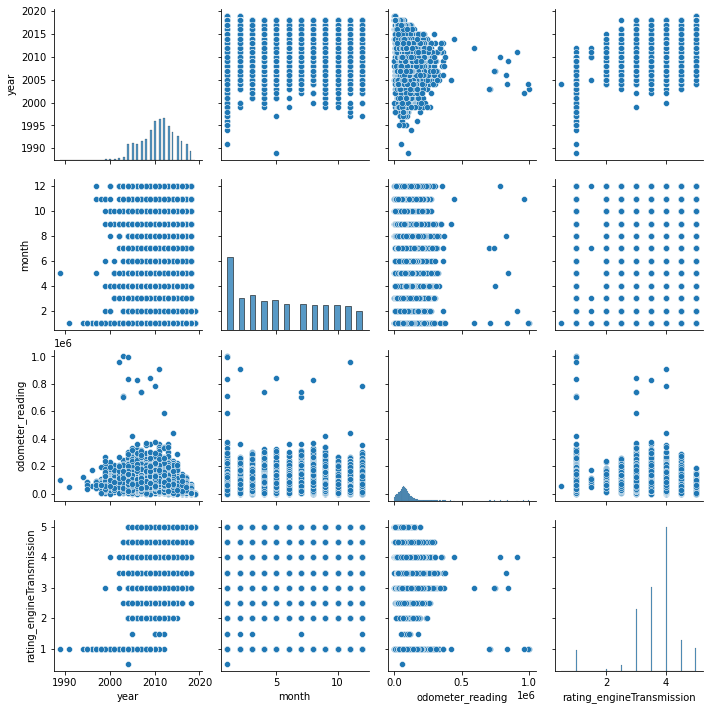

In [15]:
sns.pairplot(output_df)

In [16]:
Target = output_df['rating_engineTransmission']
Target.shape

(26307,)

In [17]:
#y = y.reshape((len(y), 1))

Target = scaler.fit_transform(pd.DataFrame(Target))
Target = Target.reshape(len(Target),1)
Target.shape

(26307, 1)

In [18]:
appointmentId = output_df['appointmentId']
appointmentId.shape

(26307,)

In [19]:
df1 = output_df.drop(["inspectionStartTime", "appointmentId","rating_engineTransmission"], axis = 1,inplace = True)
df1

In [20]:
df1

In [21]:
output_df

,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engine_value,engineTransmission_coolant_value,engineTransmission_engineMounting_value,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_exhaustSmoke_value,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type,odometer_reading
0,2008,8,No,Yes,No,Leaking,Dirty,No,No,No,No,Alternator Brg Noise,Water Pump Brg Noise,No,No,Back Compression Exist,No,Spongy,Yes,Petrol + CNG,124600
1,2007,5,Yes,Yes,No,Leaking,Dirty,No,No,Yes,No,Timing Noise,Tappet Noise,No,Yes,NO Blow-by,Yes,NaN,Yes,Petrol + CNG,78108
2,2012,5,Yes,Yes,No,Dirty,NaN,Yes,No,No,No,Alternator Brg Noise,Engine Auxiliary Noise,No,Yes,Perm. Blow By on idle,No,Hard,Yes,Diesel,93348
3,2013,1,Yes,Yes,No,Dirty,NaN,Yes,No,Yes,Yes,NaN,NaN,Yes,Yes,NO Blow-by,No,Hard,Yes,Petrol + CNG,48233
4,2011,7,Yes,Yes,No,Leaking,Leakage from Tappet Cover,No,Yes,No,No,Timing Noise,Tappet Noise,No,Yes,NO Blow-by,No,Spongy,Yes,Petrol + CNG,74368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26302,2013,3,Yes,Yes,No,Leaking,Dirty,Yes,No,Yes,No,Alternator Brg Noise,Tappet Noise,Yes,Yes,NO Blow-by,Yes,NaN,Yes,Petrol + CNG,64532
26303,2007,8,No,No,No,Dirty,NaN,No,No,No,No,Alternator Brg Noise,Timing Noise,Yes,No,Back Compression Exist,No,Hard,Yes,Petrol,88051
26304,2004,7,Yes,Yes,No,Leaking,Dirty,No,No,No,No,Timing Noise,Tappet Noise,Yes,Yes,NO Blow-by,No,Hard,Yes,Petrol,22656
26305,2010,12,Yes,Yes,No,Dirty,Leakage from Sump/chamber,Yes,Yes,No,Yes,NaN,NaN,No,Yes,NO Blow-by,Yes,NaN,Yes,Diesel,126015


In [22]:
output_df.dtypes

year                                                          int64
month                                                         int64
engineTransmission_battery_value                             object
engineTransmission_engineoilLevelDipstick_value              object
engineTransmission_engineOil                                 object
engineTransmission_engineOil_cc_value_0                      object
engineTransmission_engineOil_cc_value_1                      object
engineTransmission_engine_value                              object
engineTransmission_coolant_value                             object
engineTransmission_engineMounting_value                      object
engineTransmission_engineSound_value                         object
engineTransmission_engineSound_cc_value_0                    object
engineTransmission_engineSound_cc_value_1                    object
engineTransmission_exhaustSmoke_value                        object
engineTransmission_engineBlowByBackCompression_v

In [23]:
df_numerical = output_df.select_dtypes(exclude='object')
df_numerical


,year,month,odometer_reading
0,2008,8,124600
1,2007,5,78108
2,2012,5,93348
3,2013,1,48233
4,2011,7,74368
...,...,...,...
26302,2013,3,64532
26303,2007,8,88051
26304,2004,7,22656
26305,2010,12,126015


In [24]:
df_numerical['year'] = df_numerical['year'].astype(int)

df_numerical['month'] = df_numerical['month'].astype(int)

df_numerical['odometer_reading'] = df_numerical['odometer_reading'].astype(int)

In [25]:
df_categorical = output_df.select_dtypes(include='object')
df_categorical


,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engine_value,engineTransmission_coolant_value,engineTransmission_engineMounting_value,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_exhaustSmoke_value,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type
0,No,Yes,No,Leaking,Dirty,No,No,No,No,Alternator Brg Noise,Water Pump Brg Noise,No,No,Back Compression Exist,No,Spongy,Yes,Petrol + CNG
1,Yes,Yes,No,Leaking,Dirty,No,No,Yes,No,Timing Noise,Tappet Noise,No,Yes,NO Blow-by,Yes,NaN,Yes,Petrol + CNG
2,Yes,Yes,No,Dirty,NaN,Yes,No,No,No,Alternator Brg Noise,Engine Auxiliary Noise,No,Yes,Perm. Blow By on idle,No,Hard,Yes,Diesel
3,Yes,Yes,No,Dirty,NaN,Yes,No,Yes,Yes,NaN,NaN,Yes,Yes,NO Blow-by,No,Hard,Yes,Petrol + CNG
4,Yes,Yes,No,Leaking,Leakage from Tappet Cover,No,Yes,No,No,Timing Noise,Tappet Noise,No,Yes,NO Blow-by,No,Spongy,Yes,Petrol + CNG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26302,Yes,Yes,No,Leaking,Dirty,Yes,No,Yes,No,Alternator Brg Noise,Tappet Noise,Yes,Yes,NO Blow-by,Yes,NaN,Yes,Petrol + CNG
26303,No,No,No,Dirty,NaN,No,No,No,No,Alternator Brg Noise,Timing Noise,Yes,No,Back Compression Exist,No,Hard,Yes,Petrol
26304,Yes,Yes,No,Leaking,Dirty,No,No,No,No,Timing Noise,Tappet Noise,Yes,Yes,NO Blow-by,No,Hard,Yes,Petrol
26305,Yes,Yes,No,Dirty,Leakage from Sump/chamber,Yes,Yes,No,Yes,NaN,NaN,No,Yes,NO Blow-by,Yes,NaN,Yes,Diesel


In [26]:
df_numerical_cols = df_numerical.columns.tolist()
df_categorical_cols = df_categorical.columns.tolist()


In [27]:
df_numerical_cols

['year', 'month', 'odometer_reading']

In [28]:
df_categorical_cols

['engineTransmission_battery_value',
 'engineTransmission_engineoilLevelDipstick_value',
 'engineTransmission_engineOil',
 'engineTransmission_engineOil_cc_value_0',
 'engineTransmission_engineOil_cc_value_1',
 'engineTransmission_engine_value',
 'engineTransmission_coolant_value',
 'engineTransmission_engineMounting_value',
 'engineTransmission_engineSound_value',
 'engineTransmission_engineSound_cc_value_0',
 'engineTransmission_engineSound_cc_value_1',
 'engineTransmission_exhaustSmoke_value',
 'engineTransmission_engineBlowByBackCompression_value',
 'engineTransmission_engineBlowByBackCompression_cc_value_0',
 'engineTransmission_clutch_value',
 'engineTransmission_clutch_cc_value_0',
 'engineTransmission_gearShifting_value',
 'fuel_type']

In [29]:
df_categorical.isnull().sum()

engineTransmission_battery_value                                 0
engineTransmission_engineoilLevelDipstick_value                  0
engineTransmission_engineOil                                     0
engineTransmission_engineOil_cc_value_0                       7750
engineTransmission_engineOil_cc_value_1                      15303
engineTransmission_engine_value                                  0
engineTransmission_coolant_value                                 0
engineTransmission_engineMounting_value                          0
engineTransmission_engineSound_value                             0
engineTransmission_engineSound_cc_value_0                     7227
engineTransmission_engineSound_cc_value_1                    12802
engineTransmission_exhaustSmoke_value                            0
engineTransmission_engineBlowByBackCompression_value             0
engineTransmission_engineBlowByBackCompression_cc_value_0        0
engineTransmission_clutch_value                               

In [30]:
df_categorical['engineTransmission_engineOil_cc_value_0'] = df_categorical['engineTransmission_engineOil_cc_value_0'].fillna(df_categorical['engineTransmission_engineOil_cc_value_0'].mode()[0])

df_categorical['engineTransmission_engineOil_cc_value_1'] = df_categorical['engineTransmission_engineOil_cc_value_1'].fillna(df_categorical['engineTransmission_engineOil_cc_value_1'].mode()[0])

df_categorical['engineTransmission_engineSound_cc_value_0'] = df_categorical['engineTransmission_engineSound_cc_value_0'].fillna(df_categorical['engineTransmission_engineSound_cc_value_0'].mode()[0])

df_categorical['engineTransmission_engineSound_cc_value_1'] = df_categorical['engineTransmission_engineSound_cc_value_1'].fillna(df_categorical['engineTransmission_engineSound_cc_value_1'].mode()[0])

df_categorical['engineTransmission_clutch_cc_value_0'] = df_categorical['engineTransmission_clutch_cc_value_0'].fillna(df_categorical['engineTransmission_clutch_cc_value_0'].mode()[0])


In [31]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 18 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   engineTransmission_battery_value                           26307 non-null  object
 1   engineTransmission_engineoilLevelDipstick_value            26307 non-null  object
 2   engineTransmission_engineOil                               26307 non-null  object
 3   engineTransmission_engineOil_cc_value_0                    26307 non-null  object
 4   engineTransmission_engineOil_cc_value_1                    26307 non-null  object
 5   engineTransmission_engine_value                            26307 non-null  object
 6   engineTransmission_coolant_value                           26307 non-null  object
 7   engineTransmission_engineMounting_value                    26307 non-null  object
 8   engineTransmissi

In [32]:
df_categorical.astype(str)

,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engine_value,engineTransmission_coolant_value,engineTransmission_engineMounting_value,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_exhaustSmoke_value,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type
0,No,Yes,No,Leaking,Dirty,No,No,No,No,Alternator Brg Noise,Water Pump Brg Noise,No,No,Back Compression Exist,No,Spongy,Yes,Petrol + CNG
1,Yes,Yes,No,Leaking,Dirty,No,No,Yes,No,Timing Noise,Tappet Noise,No,Yes,NO Blow-by,Yes,Hard,Yes,Petrol + CNG
2,Yes,Yes,No,Dirty,Dirty,Yes,No,No,No,Alternator Brg Noise,Engine Auxiliary Noise,No,Yes,Perm. Blow By on idle,No,Hard,Yes,Diesel
3,Yes,Yes,No,Dirty,Dirty,Yes,No,Yes,Yes,Timing Noise,Tappet Noise,Yes,Yes,NO Blow-by,No,Hard,Yes,Petrol + CNG
4,Yes,Yes,No,Leaking,Leakage from Tappet Cover,No,Yes,No,No,Timing Noise,Tappet Noise,No,Yes,NO Blow-by,No,Spongy,Yes,Petrol + CNG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26302,Yes,Yes,No,Leaking,Dirty,Yes,No,Yes,No,Alternator Brg Noise,Tappet Noise,Yes,Yes,NO Blow-by,Yes,Hard,Yes,Petrol + CNG
26303,No,No,No,Dirty,Dirty,No,No,No,No,Alternator Brg Noise,Timing Noise,Yes,No,Back Compression Exist,No,Hard,Yes,Petrol
26304,Yes,Yes,No,Leaking,Dirty,No,No,No,No,Timing Noise,Tappet Noise,Yes,Yes,NO Blow-by,No,Hard,Yes,Petrol
26305,Yes,Yes,No,Dirty,Leakage from Sump/chamber,Yes,Yes,No,Yes,Timing Noise,Tappet Noise,No,Yes,NO Blow-by,Yes,Hard,Yes,Diesel


In [33]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 18 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   engineTransmission_battery_value                           26307 non-null  object
 1   engineTransmission_engineoilLevelDipstick_value            26307 non-null  object
 2   engineTransmission_engineOil                               26307 non-null  object
 3   engineTransmission_engineOil_cc_value_0                    26307 non-null  object
 4   engineTransmission_engineOil_cc_value_1                    26307 non-null  object
 5   engineTransmission_engine_value                            26307 non-null  object
 6   engineTransmission_coolant_value                           26307 non-null  object
 7   engineTransmission_engineMounting_value                    26307 non-null  object
 8   engineTransmissi

In [34]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   year              26307 non-null  int32
 1   month             26307 non-null  int32
 2   odometer_reading  26307 non-null  int32
dtypes: int32(3)
memory usage: 308.4 KB


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()   

In [36]:
df_categorical['engineTransmission_battery_value'] = le.fit_transform(df_categorical['engineTransmission_battery_value'])

df_categorical['engineTransmission_engineoilLevelDipstick_value'] = le.fit_transform(df_categorical['engineTransmission_engineoilLevelDipstick_value'])

df_categorical['engineTransmission_engineOil'] = le.fit_transform(df_categorical['engineTransmission_engineOil'])

df_categorical['engineTransmission_engineOil_cc_value_0'] = le.fit_transform(df_categorical['engineTransmission_engineOil_cc_value_0'])

df_categorical['engineTransmission_engineOil_cc_value_1'] = le.fit_transform(df_categorical['engineTransmission_engineOil_cc_value_1'])

df_categorical['engineTransmission_engine_value'] = le.fit_transform(df_categorical['engineTransmission_engine_value'])

df_categorical['engineTransmission_coolant_value'] = le.fit_transform(df_categorical['engineTransmission_coolant_value'])

df_categorical['engineTransmission_engineMounting_value'] = le.fit_transform(df_categorical['engineTransmission_engineMounting_value'])

df_categorical['engineTransmission_engineSound_value'] = le.fit_transform(df_categorical['engineTransmission_engineSound_value'])

df_categorical['engineTransmission_engineSound_cc_value_0'] = le.fit_transform(df_categorical['engineTransmission_engineSound_cc_value_0'])

df_categorical['engineTransmission_engineSound_cc_value_1'] = le.fit_transform(df_categorical['engineTransmission_engineSound_cc_value_1'])

df_categorical['engineTransmission_exhaustSmoke_value'] = le.fit_transform(df_categorical['engineTransmission_exhaustSmoke_value'])

df_categorical['engineTransmission_engineBlowByBackCompression_value'] = le.fit_transform(df_categorical['engineTransmission_engineBlowByBackCompression_value'])

df_categorical['engineTransmission_engineBlowByBackCompression_cc_value_0'] = le.fit_transform(df_categorical['engineTransmission_engineBlowByBackCompression_cc_value_0'])

df_categorical['engineTransmission_clutch_value'] = le.fit_transform(df_categorical['engineTransmission_clutch_value'])

df_categorical['engineTransmission_clutch_cc_value_0'] = le.fit_transform(df_categorical['engineTransmission_clutch_cc_value_0'])

df_categorical['engineTransmission_gearShifting_value'] = le.fit_transform(df_categorical['engineTransmission_gearShifting_value'])

df_categorical['fuel_type'] = le.fit_transform(df_categorical['fuel_type'])



In [37]:
df_categorical

,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engine_value,engineTransmission_coolant_value,engineTransmission_engineMounting_value,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_exhaustSmoke_value,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type
0,0,1,0,5,0,0,0,0,0,0,5,0,0,0,0,6,1,4
1,1,1,0,5,0,0,0,1,0,4,3,0,1,1,1,3,1,4
2,1,1,0,0,0,1,0,0,0,0,1,0,1,3,0,3,1,0
3,1,1,0,0,0,1,0,1,1,4,3,1,1,1,0,3,1,4
4,1,1,0,5,3,0,1,0,0,4,3,0,1,1,0,6,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26302,1,1,0,5,0,1,0,1,0,0,3,1,1,1,1,3,1,4
26303,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,3,1,3
26304,1,1,0,5,0,0,0,0,0,4,3,1,1,1,0,3,1,3
26305,1,1,0,0,2,1,1,0,1,4,3,0,1,1,1,3,1,0


In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df_numerical [['year', 'month', 'odometer_reading']] = scaler.fit_transform(df_numerical [['year', 'month', 'odometer_reading']])

In [39]:
df_numerical

,year,month,odometer_reading
0,0.633333,0.636364,0.124599
1,0.600000,0.363636,0.078107
2,0.766667,0.363636,0.093347
3,0.800000,0.000000,0.048232
4,0.733333,0.545455,0.074367
...,...,...,...
26302,0.800000,0.181818,0.064531
26303,0.600000,0.636364,0.088050
26304,0.500000,0.545455,0.022655
26305,0.700000,1.000000,0.126014


In [40]:
df_categorical

,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engine_value,engineTransmission_coolant_value,engineTransmission_engineMounting_value,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_exhaustSmoke_value,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type
0,0,1,0,5,0,0,0,0,0,0,5,0,0,0,0,6,1,4
1,1,1,0,5,0,0,0,1,0,4,3,0,1,1,1,3,1,4
2,1,1,0,0,0,1,0,0,0,0,1,0,1,3,0,3,1,0
3,1,1,0,0,0,1,0,1,1,4,3,1,1,1,0,3,1,4
4,1,1,0,5,3,0,1,0,0,4,3,0,1,1,0,6,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26302,1,1,0,5,0,1,0,1,0,0,3,1,1,1,1,3,1,4
26303,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,3,1,3
26304,1,1,0,5,0,0,0,0,0,4,3,1,1,1,0,3,1,3
26305,1,1,0,0,2,1,1,0,1,4,3,0,1,1,1,3,1,0


In [41]:
df_numerical

,year,month,odometer_reading
0,0.633333,0.636364,0.124599
1,0.600000,0.363636,0.078107
2,0.766667,0.363636,0.093347
3,0.800000,0.000000,0.048232
4,0.733333,0.545455,0.074367
...,...,...,...
26302,0.800000,0.181818,0.064531
26303,0.600000,0.636364,0.088050
26304,0.500000,0.545455,0.022655
26305,0.700000,1.000000,0.126014


In [42]:
X = df_categorical.join(df_numerical)
X

,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engine_value,engineTransmission_coolant_value,engineTransmission_engineMounting_value,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_exhaustSmoke_value,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_gearShifting_value,fuel_type,year,month,odometer_reading
0,0,1,0,5,0,0,0,0,0,0,5,0,0,0,0,6,1,4,0.633333,0.636364,0.124599
1,1,1,0,5,0,0,0,1,0,4,3,0,1,1,1,3,1,4,0.600000,0.363636,0.078107
2,1,1,0,0,0,1,0,0,0,0,1,0,1,3,0,3,1,0,0.766667,0.363636,0.093347
3,1,1,0,0,0,1,0,1,1,4,3,1,1,1,0,3,1,4,0.800000,0.000000,0.048232
4,1,1,0,5,3,0,1,0,0,4,3,0,1,1,0,6,1,4,0.733333,0.545455,0.074367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26302,1,1,0,5,0,1,0,1,0,0,3,1,1,1,1,3,1,4,0.800000,0.181818,0.064531
26303,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,3,1,3,0.600000,0.636364,0.088050
26304,1,1,0,5,0,0,0,0,0,4,3,1,1,1,0,3,1,3,0.500000,0.545455,0.022655
26305,1,1,0,0,2,1,1,0,1,4,3,0,1,1,1,3,1,0,0.700000,1.000000,0.126014


In [43]:
Target

array([[0.55555556],
       [0.77777778],
       [0.66666667],
       ...,
       [0.66666667],
       [0.88888889],
       [0.88888889]])

In [45]:
Target = Target.astype(int)

In [46]:
y = scaler.fit_transform(Target)

In [47]:
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [48]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(X, y, test_size=0.33, random_state=0)

In [49]:
def apply_model(model,Xtrain,Xtest,ytrain,ytest):
    model.fit(Xtrain,ytrain)
    prediction=model.predict(Xtest)
    acc = round(accuracy_score(prediction,ytest)*100,2)
    return acc

In [50]:
from sklearn.metrics import accuracy_score

# Apply logistic regression
from sklearn.linear_model import LogisticRegression # Logistic Regression
logitmodel = LogisticRegression()
logireg_acc=apply_model(logitmodel,Xtrain,Xtest,ytrain,ytest)
print('The accuracy of the Logistic Regression is', logireg_acc)
 
#Apply  Random Forests
from sklearn.ensemble import RandomForestClassifier
 
randf_model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
 
randf_acc = apply_model(randf_model,Xtrain,Xtest,ytrain,ytest)
print('The accuracy of the Random Forest Classifier is', randf_acc)
 
# Apply SVM
from sklearn.svm import SVC, LinearSVC
svm_model = SVC()
svm_acc = apply_model(svm_model,Xtrain,Xtest,ytrain,ytest)
print('The accuracy of the Support Vector Machines Classifier is', svm_acc)
 
#Apply knn
from sklearn.neighbors import KNeighborsClassifier
 
knn_acc = apply_model(KNeighborsClassifier(n_neighbors = 4),Xtrain,Xtest,ytrain,ytest)
print('The accuracy of the K Nearst Neighbors Classifier is', knn_acc)
 
#Apply Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree_model= DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto')
dtree_acc = apply_model(dtree_model,Xtrain,Xtest,ytrain,ytest)
print('The accuracy of the DecisionTree Classifier is', dtree_acc)
 
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest','Support Vector Machines', 'KNN', 
               'DecisionTree Classifier'],
    'Score': [logireg_acc, randf_acc, svm_acc, 
              knn_acc, dtree_acc]})
models = models.sort_values(by='Score', ascending=False)
models = models.set_index('Score')
models


C:\Users\Lavis\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lavis\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy of the Logistic Regression is 96.11


C:\Users\Lavis\AppData\Local\Temp\ipykernel_7720\2489458264.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(Xtrain,ytrain)
C:\Users\Lavis\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


The accuracy of the Random Forest Classifier is 96.14


C:\Users\Lavis\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of the Support Vector Machines Classifier is 95.81


C:\Users\Lavis\anaconda3\envs\myenv\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


The accuracy of the K Nearst Neighbors Classifier is 95.2
The accuracy of the DecisionTree Classifier is 94.85


C:\Users\Lavis\anaconda3\envs\myenv\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


,Model
Score,
96.14,Random Forest
96.11,Logistic Regression
95.81,Support Vector Machines
95.20,KNN
94.85,DecisionTree Classifier


#### Insights

Q.1) Briefly describe your approach to this problem and the steps you took

Solution: a) Import the data
          b) Check the attributes and understand the dataframe structure
          c) Check the null values, blanks, datatypes
          d) Preprocessing
          e) test-train split
          f) model fit
          g) and predict, accuracy

Q.2) How do you know for sure that’s how well it works?


Solution: Because of the understanding of structure dataframe. Most columns are having the multicategorical values, I knew somewhere each model will fit on the train subset.

Q.3) What stats did you use to prove its predictive performance and why?

Solution: I didn't use any stats for the modeling. basic descriptive statistics I used. forex: mean, median, mode.

Q.4) What issues did you encounter?

Solution: The most of the columns are having 'Null values'. Dealing with null values are very cliche. so Encountering with null values are fun.

Q.5) What insights did you obtain from this data? For example: What features are important? Why? What
visualisations help you understand the data?

Solution: These are some features ['engineTransmission_battery_value',
 'engineTransmission_engineoilLevelDipstick_value',
 'engineTransmission_engineOil',
 'engineTransmission_engineOil_cc_value_0',
 'engineTransmission_engineOil_cc_value_1',
 'engineTransmission_engine_value',
 'engineTransmission_coolant_value',
 'engineTransmission_engineMounting_value',
 'engineTransmission_engineSound_value',
 'engineTransmission_engineSound_cc_value_0',
 'engineTransmission_engineSound_cc_value_1',
 'engineTransmission_exhaustSmoke_value',
 'engineTransmission_engineBlowByBackCompression_value',
 'engineTransmission_engineBlowByBackCompression_cc_value_0',
 'engineTransmission_clutch_value',
 'engineTransmission_clutch_cc_value_0',
 'engineTransmission_gearShifting_value',
 'fuel_type'].
    
    Pairplot is help me to understand the data.

Q.6) What other data (if any) woul nelpedd have been useful?

Solution: More than text if some of the columns would have numerical values. It would be helped us to create more insight.

Q.7) What are some other things you would have done if you had more time?

Solution: Will work on the feature engineering.